In [94]:
###############################################################################
#                              Importing required Libraries                    #
###############################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
from pandas.plotting import parallel_coordinates
import plotly
import plotly.graph_objs as go
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import math
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import ensemble
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split
import itertools
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import confusion_matrix as cf
from sklearn.metrics import precision_recall_fscore_support as f1
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [95]:
###############################################################################
#                              Ingesting data as csv file 
###############################################################################
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [96]:
data = data.drop(['time'], axis=1)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [97]:
corr = data.corr()
corr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


<AxesSubplot:>

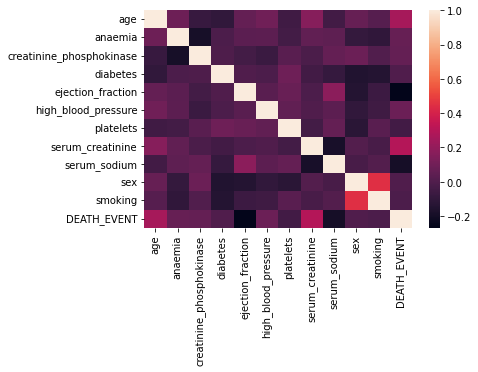

In [98]:
sns.heatmap(corr)

In [99]:
###############################################################################
#                              correlated features identification 
###############################################################################
correlated_features = set()
correlation_matrix = data.drop('DEATH_EVENT', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)


In [100]:
###############################################################################
#                      Dimensionality reduction using RFECV 
###############################################################################
X = data.drop('DEATH_EVENT', axis=1)
target = data['DEATH_EVENT']

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=101), scoring='accuracy')

In [101]:
print(np.where(rfecv.support_ == False)[0])
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 1  3  5  9 10]


In [102]:
rfecv.estimator_.feature_importances_

array([0.16105185, 0.15512285, 0.19164005, 0.15285816, 0.22456517,
       0.11476192])

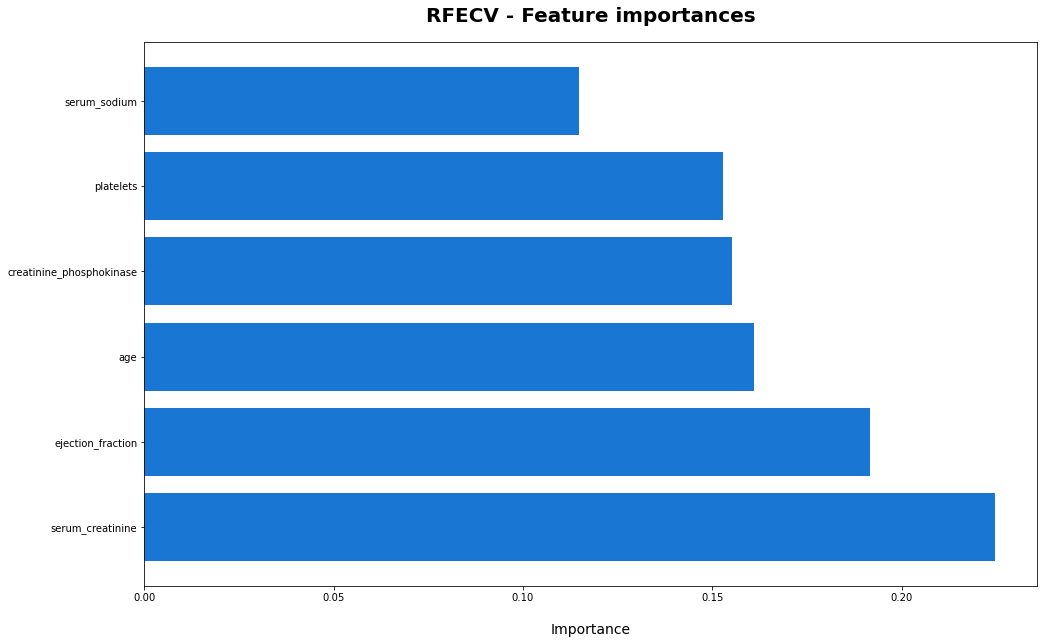

In [103]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 10))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [104]:
y = target
print(X.columns)
X.shape, y.shape

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium'],
      dtype='object')


((299, 6), (299,))

In [105]:
###############################################################################
#                              TrainTest split method                         #
###############################################################################
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((224, 6), (224,), (75, 6), (75,))

In [106]:
##plotly.offline.plot(data, filename = 'C:/Users/mac4m/Documents/dswp/machine_learning_examples-master/parallel_coordinates_plot_16.html', auto_open= True)

In [107]:
###############################################################################
#                               4. Scale data                                 #
###############################################################################
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [108]:
###############################################################################
#                              5. Good Ol' Classifiers                        #
###############################################################################

# Initializing Random Forest classifier
classifier1 = RandomForestClassifier(n_estimators = 500, criterion = "gini", max_depth = 10,
                                     max_features = "auto", min_samples_leaf = 0.005,
                                     min_samples_split = 0.005, n_jobs = -1, random_state = 1000)

# Initializing for KNN classifier
classifier2 = knn(n_neighbors=3)



In [109]:
###############################################################################
#                       7. Putting classifiers in a dictionary                #
###############################################################################
# Create list to store classifiers
classifiers = {"RF": classifier1,
               "knn": classifier2}

In [110]:
###############################################################################
#                               8. Train classifiers                          #
###############################################################################
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier

Accuracy: 0.8266666666666667
[[44  6]
 [ 7 18]]
f1 Score: (array([0.88, 0.72]), array([0.8627451, 0.75     ]), array([0.87128713, 0.73469388]), array([51, 24], dtype=int64))


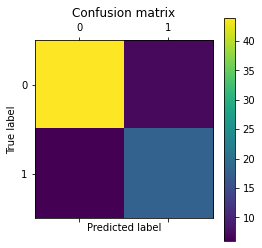

Accuracy: 0.7333333333333333
[[44 13]
 [ 7 11]]
f1 Score: (array([0.77192982, 0.61111111]), array([0.8627451 , 0.45833333]), array([0.81481481, 0.52380952]), array([51, 24], dtype=int64))


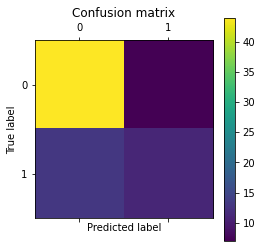

In [111]:
###############################################################################
#                              9. Making predictions                          #
###############################################################################
# Get results
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test)[:,1]
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred
## run confusion matrix here
    threshold = 0.50
    y_pred1 = (classifiers[key].predict_proba(X_test)[:, 1] > threshold).astype('float')
    print ('Accuracy:', accuracy_score(y_test, y_pred1))
    print (cf(y_pred1,y_test))
    print ("f1 Score:", f1(y_test, y_pred1))

    plt.matshow(cf(y_test, y_pred1))
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
# Add the test set to the results object
results["Target"] = y_test



In [112]:
y_pred

array([0.66666667, 0.66666667, 0.        , 1.        , 0.33333333,
       0.66666667, 0.33333333, 0.33333333, 0.        , 0.33333333,
       0.        , 0.        , 0.33333333, 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.66666667, 1.        ,
       0.33333333, 0.        , 0.33333333, 0.        , 0.        ,
       0.        , 0.33333333, 0.66666667, 0.33333333, 0.        ,
       0.        , 0.        , 0.33333333, 0.        , 0.        ,
       0.        , 0.33333333, 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.33333333, 0.66666667, 0.33333333,
       0.66666667, 0.        , 0.33333333, 0.        , 0.66666667,
       0.33333333, 0.        , 0.66666667, 0.33333333, 0.        ,
       0.        , 0.33333333, 0.66666667, 0.66666667, 0.33333333,
       0.33333333, 0.33333333, 0.        , 0.66666667, 0.66666667,
       0.33333333, 0.33333333, 0.33333333, 0.        , 0.        ,
       0.33333333, 0.        , 0.        , 0.33333333, 0.     

In [113]:
y_pred

array([0.66666667, 0.66666667, 0.        , 1.        , 0.33333333,
       0.66666667, 0.33333333, 0.33333333, 0.        , 0.33333333,
       0.        , 0.        , 0.33333333, 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.66666667, 1.        ,
       0.33333333, 0.        , 0.33333333, 0.        , 0.        ,
       0.        , 0.33333333, 0.66666667, 0.33333333, 0.        ,
       0.        , 0.        , 0.33333333, 0.        , 0.        ,
       0.        , 0.33333333, 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.33333333, 0.66666667, 0.33333333,
       0.66666667, 0.        , 0.33333333, 0.        , 0.66666667,
       0.33333333, 0.        , 0.66666667, 0.33333333, 0.        ,
       0.        , 0.33333333, 0.66666667, 0.66666667, 0.33333333,
       0.33333333, 0.33333333, 0.        , 0.66666667, 0.66666667,
       0.33333333, 0.33333333, 0.33333333, 0.        , 0.        ,
       0.33333333, 0.        , 0.        , 0.33333333, 0.     